## Section A:

### Q1. Read the file 'Automobile_data.csv' and answer the following questions:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_csv('autoss.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### 1.A) What are the types of variables present in the dataset and find the feature which can be rejected on the basis of highest Pearson’s correlation? 

In [32]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [33]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### 1.B) Find the percentage of zeros present in the feature 'symbolling'

In [34]:
data1=data['symboling'].value_counts()
val=data1[0]
perc = (val/205)*100
print('Percentage of zeros values are: ',perc)

Percentage of zeros values are:  32.6829268292683


#### 1.C) Replace the '?' present in the normalised-losses feature of the dataset with the mean value of the same column 

In [35]:
data['normalized-losses'].loc[data['normalized-losses'] == '?'].count()

41

In [36]:
nl = data['normalized-losses'].loc[data['normalized-losses'] != '?']
nmean = nl.astype(str).astype(int).mean()
data['normalized-losses'] = data['normalized-losses'].replace('?',nmean).astype(int)
data['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

### Q2.1 Do the needful conversion for the 'price' feature in the 'Automobile_data.csv ‘dataset and plot the boxplot between 'price' and 'make' and answer the following questions? 

In [37]:
data['price'].loc[data['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [38]:
pri = data['price'].loc[data['price'] != '?']
pmean = pri.astype(str).astype(int).mean()
data['price'] = data['price'].replace('?',pmean).astype(int)
data['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

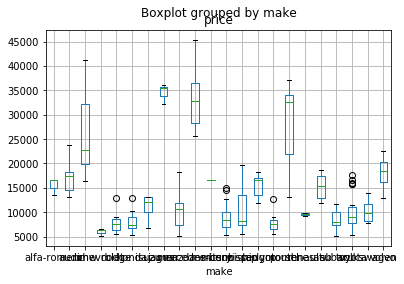

In [41]:
data.boxplot('price','make')

#### a. Which is the most expensive and the least expensive car? 

In [54]:
print('The Most Expensive Car is :')
data [['make','price']][data.price==data['price'].max()]

The Most Expensive Car is :


,make,price
74,mercedes-benz,45400


In [55]:
print('The least Expensive Car is :')
data [['make','price']][data.price==data['price'].min()]

The least Expensive Car is :


,make,price
138,subaru,5118


#### b. Name the premium cars whose price is more than 20,000?

In [58]:
data.make[data.price>20000]

8               audi
12               bmw
13               bmw
14               bmw
15               bmw
16               bmw
17               bmw
47            jaguar
48            jaguar
49            jaguar
67     mercedes-benz
68     mercedes-benz
69     mercedes-benz
70     mercedes-benz
71     mercedes-benz
72     mercedes-benz
73     mercedes-benz
74     mercedes-benz
125          porsche
126          porsche
127          porsche
128          porsche
202            volvo
203            volvo
204            volvo
Name: make, dtype: object

#### c. Name the less expensive cars whose price is less than 10,000?

In [59]:
data.make[data.price<10000]

18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
30          honda
31          honda
32          honda
33          honda
34          honda
35          honda
36          honda
37          honda
38          honda
39          honda
43          isuzu
50          mazda
51          mazda
52          mazda
53          mazda
54          mazda
59          mazda
60          mazda
76     mitsubishi
          ...    
150        toyota
151        toyota
152        toyota
153        toyota
154        toyota
155        toyota
156        toyota
157        toyota
158        toyota
159        toyota
160        toyota
161        toyota
162        toyota
163        toyota
164        toyota
165        toyota
166        toyota
167        toyota
168        toyota
169        toyota
173        toyota
175        toyota
182    volkswagen
183    volkswagen
184    vol

### Q2.2. Make a suitable plot which can justify that as the engine size increases the price also increases proportionally? 

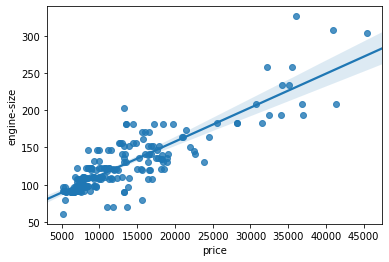

In [62]:
l = sns.regplot('price',"engine-size", data)

### Q3.1) Find the city-mpg mean value for each category of drive-wheels and represent them in a bar plot. 

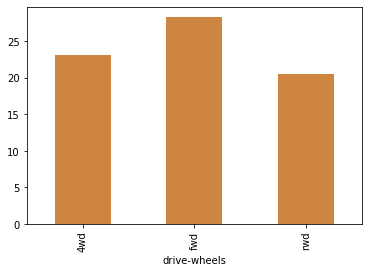

In [67]:
data.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru')

### Q3.2) Use a boxplot visualisation technique to find which is the most expensive drive-wheel cars and least expensive drive-wheels cars? 

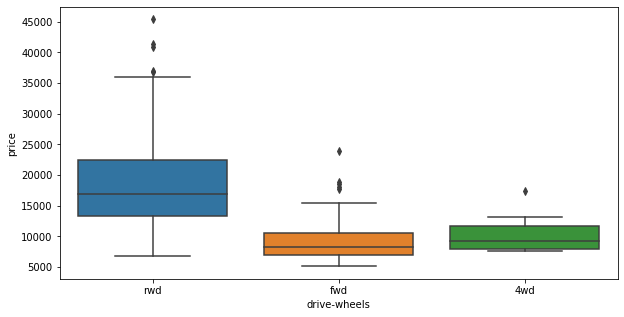

In [68]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=data)

### Q3.3) Use suitable visualisation technique to find the relationship between city-mpg and curb-weight? 

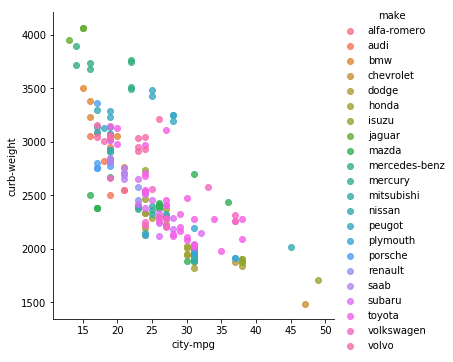

In [69]:
l = sns.lmplot('city-mpg',"curb-weight", data, hue="make", fit_reg=False);

### Q4) For the 'Uber Request Data.csv' dataset solve the following questions:

In [70]:
uber_data=pd.read_csv('Uber+Request+Data.csv')
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


#### a) Remove Driver_id column? 

In [71]:
uber_data1 = uber_data.drop("Driver id",axis=1)
uber_data1.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


#### b) How many unique pickup points are present in uberReq? 

In [72]:
uber_data1['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

#### c)How many observations are present in uberReq? 

In [100]:
uber_data1['Request timestamp'].nunique()

5618

#### d)Number of null values? 

In [101]:
uber_data1.isnull().sum()

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

#### e) Inspecting (Removal if required) the null values? 

In [102]:
uber_data2 = uber_data1.drop('Drop timestamp', axis = 1)

## Section B:

### Q5) Read the file 'My Uber Drives - 2016.csv' and do as followed: 

In [73]:
uber_drive=pd.read_csv('Uber+Drives+2016.csv')
uber_drive.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### a) Remove feature with least importance to you, and fix the data types of columns whose data- type seems to be ambiguous to you. 

In [103]:
uber_drive = uber_drive.drop('PURPOSE*',axis = 1)

#### b) Plot number of trips for each category 

In [104]:
uber_drive['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

#### c) Find that hour of the day, when the number of trips are maximum. 

In [106]:
uber_drive = uber_drive.dropna(how='any',axis = 0)

In [122]:
import datetime
import sys
from dateutil import parser
uber_drive['START_DATE*'] = pd.to_datetime(uber_drive['START_DATE*'])
uber_drive['END_DATE*'] = pd.to_datetime(uber_drive['END_DATE*'])

In [123]:
uber_drive['START_DATE*'].dt.hour.value_counts()

15    98
17    95
18    94
13    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
21    51
9     51
8     35
22    31
23    26
0     19
7     13
1      5
6      4
5      4
3      3
2      2
Name: START_DATE*, dtype: int64

In [124]:
uber_drive['END_DATE*'].dt.hour.value_counts()

17    101
15     99
13     92
18     90
14     90
19     83
16     82
20     74
12     72
10     63
11     62
21     49
9      49
22     39
8      28
23     26
0      24
1      10
6       6
7       5
2       5
5       2
4       2
3       2
Name: END_DATE*, dtype: int64

### 6) Read the file 'battles.csv' and solve the following:

In [74]:
batt_data=pd.read_csv('battles.csv')
batt_data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


#### a) Drop the null values from defender_size, attacker_size and attacker_outcome. And store them into new data frame? 

In [115]:
batt_data1= batt_data[['defender_size','attacker_size','attacker_outcome']]
batt_data1.head()

,defender_size,attacker_size,attacker_outcome
0,4000.0,15000.0,win
1,120.0,NaN,win
2,10000.0,15000.0,win
3,20000.0,18000.0,loss
4,6000.0,1875.0,win


In [116]:
batt_data1 = batt_data1.dropna(how='any',axis = 0)

In [117]:
batt_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 30
Data columns (total 3 columns):
defender_size       15 non-null float64
attacker_size       15 non-null float64
attacker_outcome    15 non-null object
dtypes: float64(2), object(1)
memory usage: 480.0+ bytes


#### b) Plot a pair plot for the formed data frame (new_battle) and map according to the attacker_outcome and give the inference

In [126]:
batt_data1= pd.get_dummies(batt_data1,columns=['attacker_outcome'],drop_first=True)

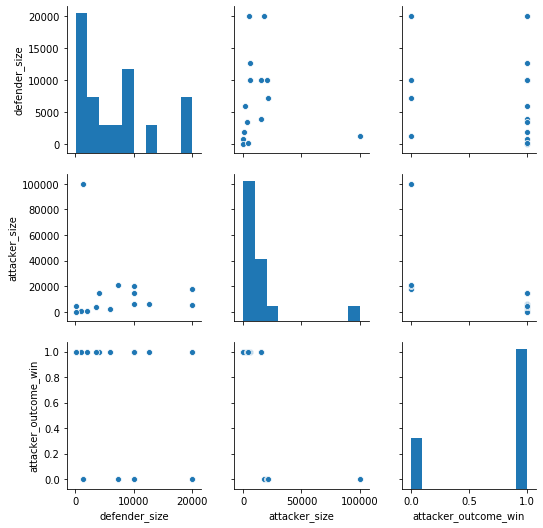

In [127]:
sns.pairplot(data=batt_data1)

#### c) From the main data frame (battles.csv) do the plot for yearly wise battles where attacker outcome is lost and win in separate bar plots?—(

In [128]:
new_data= pd.get_dummies(batt_data,columns=['attacker_outcome'],drop_first=True)

In [129]:
new_data.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'battle_type', 'major_death',
       'major_capture', 'attacker_size', 'defender_size', 'attacker_commander',
       'defender_commander', 'summer', 'location', 'region', 'note',
       'attacker_outcome_win'],
      dtype='object')

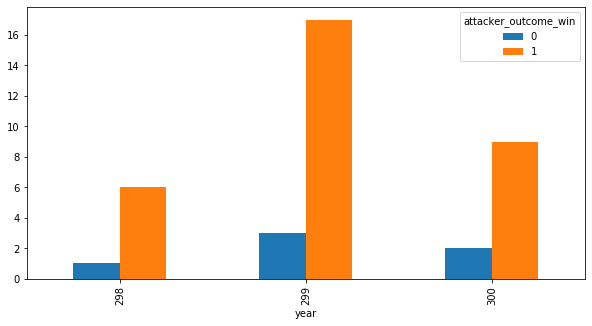

In [131]:
pd.crosstab(new_data.year, new_data.attacker_outcome_win).plot(kind='bar')

In [132]:
batt1 = batt_data[batt_data['attacker_outcome']=='win']
batt2 = batt_data[batt_data['attacker_outcome']=='loss']

Text(0.5, 1.0, 'Attacker Won')

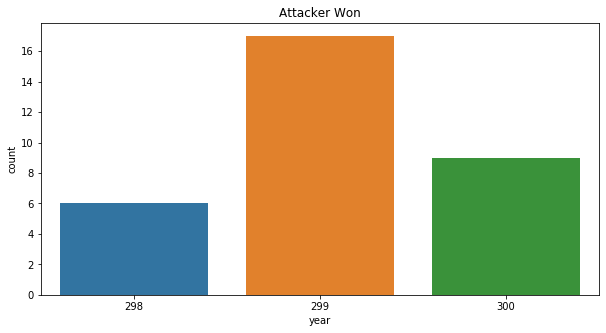

In [133]:
sns.countplot(batt1.year)
plt.title('Attacker Won')

Text(0.5, 1.0, 'Attacker loss')

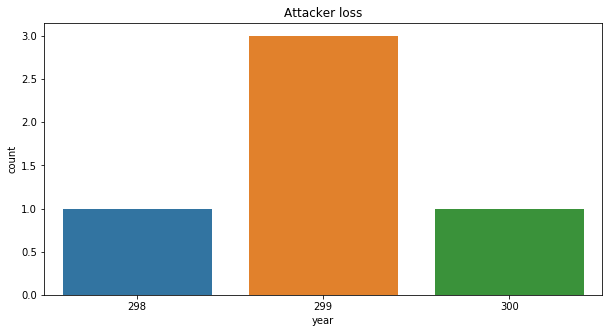

In [134]:
sns.countplot(batt2.year)
plt.title('Attacker loss')

#### d) Which King has won the maximum number of battles??

In [135]:
pd.crosstab(batt_data.attacker_king, batt_data.attacker_outcome_win)

AttributeError: 'DataFrame' object has no attribute 'attacker_outcome_win'

## Section C:

### Q7. Read the file 'pgaTourData.csv' and solve the following

In [75]:
pga_data=pd.read_csv('pgaTourData.csv')
pga_data.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


#### a) Replace both the Nan values in "Top 10" and "wins" with 0 

In [76]:
pga_data['Top 10'].fillna(0, inplace=True)
pga_data['Top 10'] = pga_data['Top 10'].astype(int)

In [77]:
pga_data['Wins'].fillna(0, inplace=True)
pga_data['Wins'] = pga_data['Wins'].astype(int)

In [78]:
pga_data.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1,3,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",0,3,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


#### b) Drop the NaN values and change the data type of 'Wins’, ‘Top 10' and 'Rounds' to an integer type 

In [81]:
pga_data.dropna(axis = 0, inplace=True)

In [82]:
pga_data['Rounds'] = pga_data['Rounds'].astype(int)
pga_data['Top 10'] = pga_data['Top 10'].astype(int)
pga_data['Wins'] = pga_data['Wins'].astype(int)

In [84]:
pga_data.dtypes

Player Name            object
Rounds                  int32
Fairway Percentage    float64
Year                    int64
Avg Distance          float64
gir                   float64
Average Putts         float64
Average Scrambling    float64
Average Score         float64
Points                 object
Wins                    int32
Top 10                  int32
Average SG Putts      float64
Average SG Total      float64
SG:OTT                float64
SG:APR                float64
SG:ARG                float64
Money                  object
dtype: object

#### c) Remove ',' from the column 'Points' and convert it into an integer type 

In [85]:
pga_data['Points'] = pga_data['Points'].apply(lambda x: x.replace(',',''))
pga_data['Points'] = pga_data['Points'].astype(int)

In [86]:
pga_data.dtypes

Player Name            object
Rounds                  int32
Fairway Percentage    float64
Year                    int64
Avg Distance          float64
gir                   float64
Average Putts         float64
Average Scrambling    float64
Average Score         float64
Points                  int32
Wins                    int32
Top 10                  int32
Average SG Putts      float64
Average SG Total      float64
SG:OTT                float64
SG:APR                float64
SG:ARG                float64
Money                  object
dtype: object

#### d) Remove , and $  from the column Money and convert it into an integer type 

In [87]:
pga_data['Money'] = pga_data['Money'].apply(lambda x: x.replace('$',''))
pga_data['Money'] = pga_data['Money'].apply(lambda x: x.replace(',',''))
pga_data['Money'] = pga_data['Money'].astype(int)

In [88]:
pga_data.dtypes

Player Name            object
Rounds                  int32
Fairway Percentage    float64
Year                    int64
Avg Distance          float64
gir                   float64
Average Putts         float64
Average Scrambling    float64
Average Score         float64
Points                  int32
Wins                    int32
Top 10                  int32
Average SG Putts      float64
Average SG Total      float64
SG:OTT                float64
SG:APR                float64
SG:ARG                float64
Money                   int32
dtype: object

#### e) Make a distribution plot for all the features and provide insights on it 

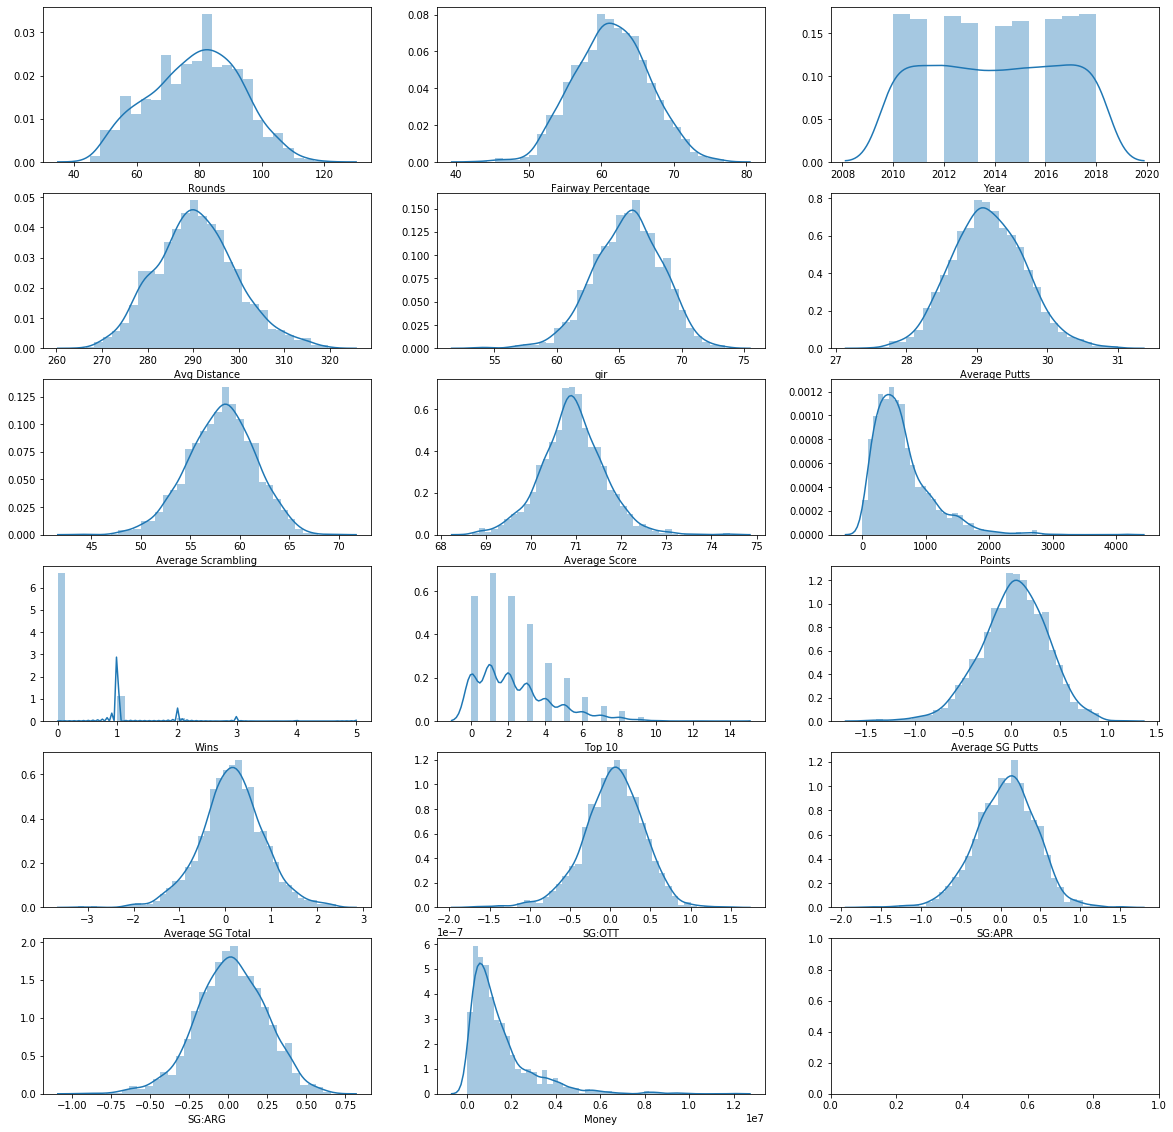

In [89]:
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
dist = pga_data.loc[:,pga_data.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(dist):
    p = sns.distplot(pga_data[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

#### f) Find the number of players with "Wins" for each and every year. Convert the same to an integer. Replace Null values with 0 if present 

In [90]:
win = pga_data.groupby('Year')['Wins'].value_counts()
win = win.unstack()
win.fillna(0, inplace=True)
win = win.astype(int)
print(win)

Wins    0   1  2  3  4  5
Year                     
2010  166  21  5  0  0  0
2011  156  25  5  0  0  0
2012  159  26  4  1  0  0
2013  152  24  3  0  0  1
2014  142  29  3  2  0  0
2015  150  29  2  1  1  0
2016  152  28  4  1  0  0
2017  156  30  0  3  1  0
2018  158  26  5  3  0  0


In [91]:
pga_data.dtypes

Player Name            object
Rounds                  int32
Fairway Percentage    float64
Year                    int64
Avg Distance          float64
gir                   float64
Average Putts         float64
Average Scrambling    float64
Average Score         float64
Points                  int32
Wins                    int32
Top 10                  int32
Average SG Putts      float64
Average SG Total      float64
SG:OTT                float64
SG:APR                float64
SG:ARG                float64
Money                   int32
dtype: object

### Q8). Solve the following questions on 'pgaTourData.csv' dataset

#### a) Find the percentage of players without a win in each and every year and plot the same. Provide insights on it

In [92]:
players = win.apply(lambda x: np.sum(x), axis=1)
percent_no_win = win[0]/players
percent_no_win = percent_no_win*100
print(percent_no_win)

Year
2010    86.458333
2011    83.870968
2012    83.684211
2013    84.444444
2014    80.681818
2015    81.967213
2016    82.162162
2017    82.105263
2018    82.291667
dtype: float64


Text(0.5, 1.0, 'Percentage of Players without a Win')

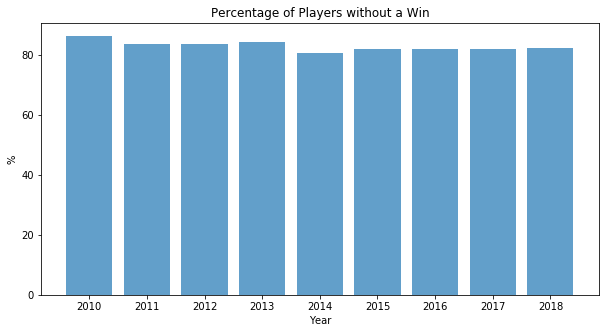

In [93]:
fig, ax = plt.subplots()
bar_width = 0.8
opacity = 0.7 
index = np.arange(2010, 2019)

plt.bar(index, percent_no_win, bar_width, alpha = opacity)
plt.xticks(index)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Percentage of Players without a Win')

#### b) Find the percentage of people who did not get placed in the top 10 each year and provide insights 

In [94]:
top10 = pga_data.groupby('Year')['Top 10'].value_counts()
top10 = top10.unstack()
top10.fillna(0, inplace=True)
players = top10.apply(lambda x: np.sum(x), axis=1)
no_top10 = top10[0]/players * 100
print(no_top10)

Year
2010    17.187500
2011    25.268817
2012    23.157895
2013    18.888889
2014    16.477273
2015    18.579235
2016    20.000000
2017    15.789474
2018    17.187500
dtype: float64


#### c) Find the longest hitters 

In [96]:
long_dist = pga_data[['Year','Player Name','Avg Distance']].copy()
long_dist.sort_values(by='Avg Distance', inplace=True, ascending=False)
print(long_dist.head())

      Year     Player Name  Avg Distance
162   2018    Rory McIlroy         319.7
1481  2011     J.B. Holmes         318.4
174   2018   Trey Mullinax         318.3
732   2015  Dustin Johnson         317.7
350   2017    Rory McIlroy         316.7


#### d) Explore the Earnings of Players 

In [97]:
top_earn = pga_data[['Year','Player Name','Money']].copy()
top_earn.sort_values(by='Money', inplace=True, ascending=False)
print(top_earn.head())

     Year     Player Name     Money
647  2015   Jordan Spieth  12030465
361  2017   Justin Thomas   9921560
303  2017   Jordan Spieth   9433033
729  2015       Jason Day   9403330
520  2016  Dustin Johnson   9365185


#### e) With the help of visualisation technique show the comparison between the average players and the champion players on the basis of each feature given in the dataset for every year?

Index(['Rounds', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG',
       'Money'],
      dtype='object')


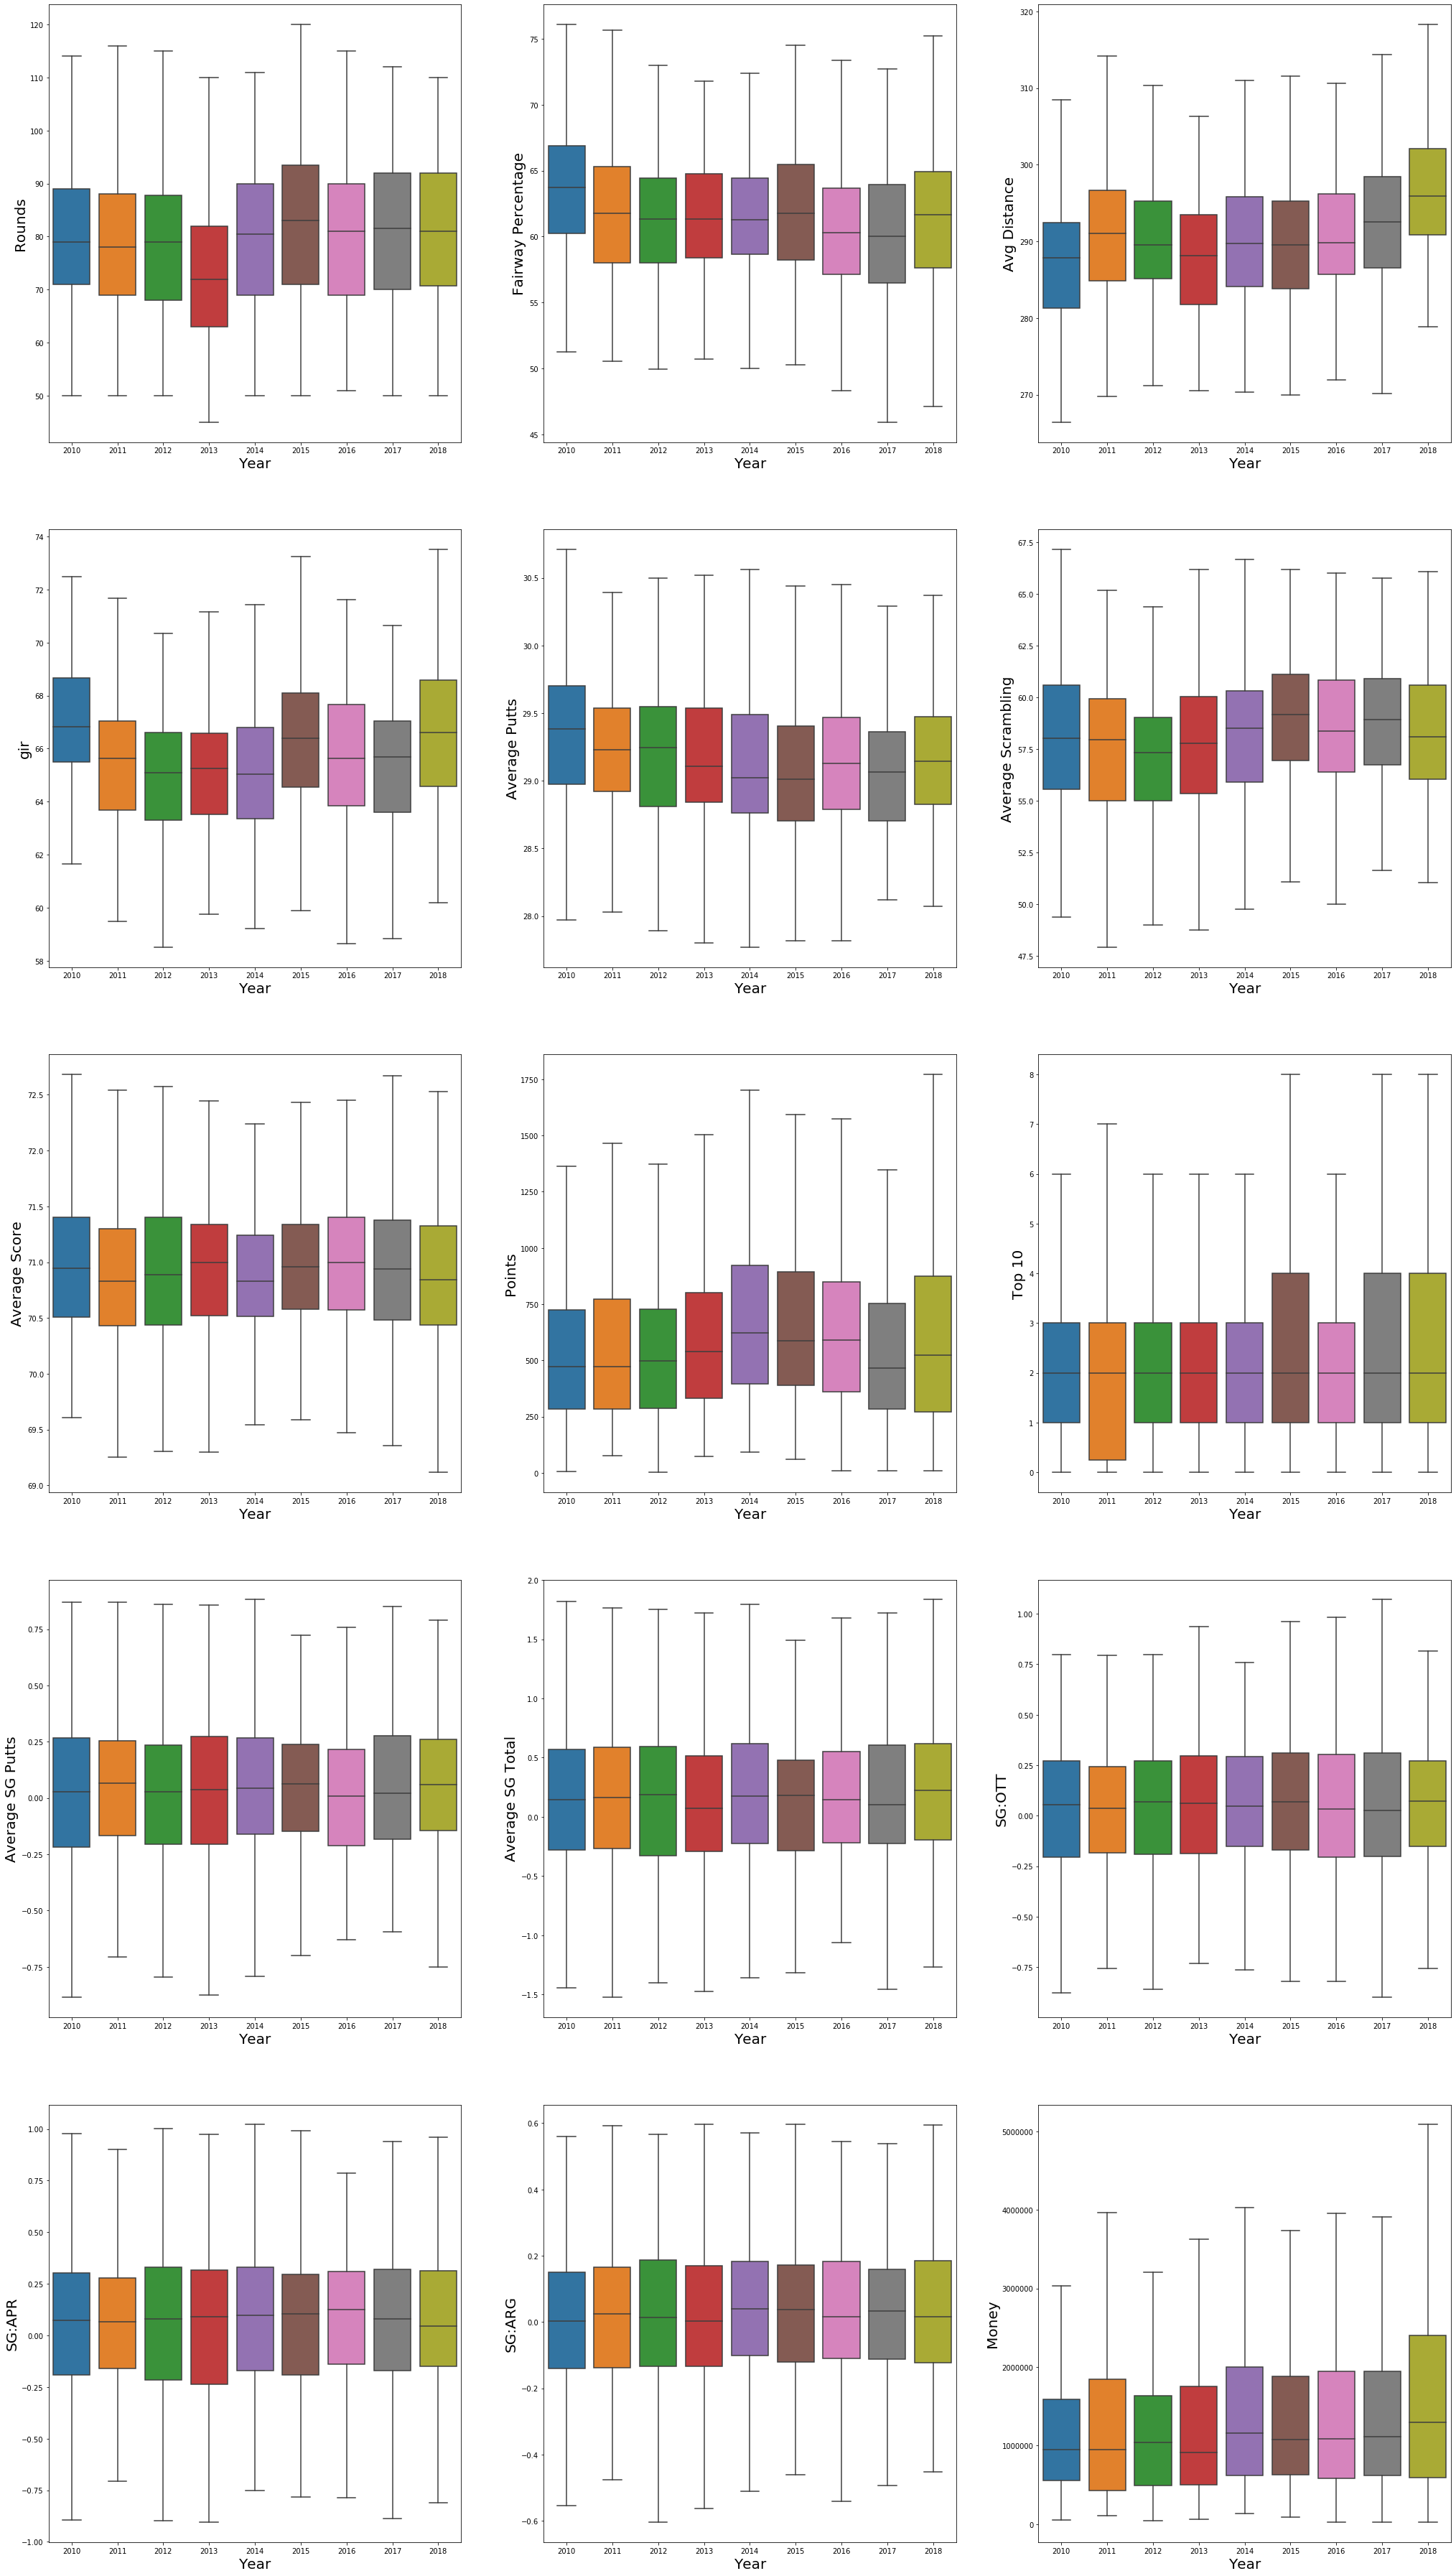

In [119]:
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
dist = pga_data.loc[:,(pga_data.columns!='Player Name') & (pga_data.columns!='Wins')].columns
dist = dist[dist != 'Year']
print(dist)
rows = 0
cols = 0
for i, column in enumerate(dist):
    p = sns.boxplot(x = 'Year', y = column, data=pga_data, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1